### Load Library

In [2]:
import pandas as pd
import numpy as np
import random

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  QuantileTransformer

### Load in Test and Validation Data

y_test and y_val labels have to be converted to integer for roc computation
x_test and x_val needs to have certain columns dropped

In [3]:
## Load in Test Set
X_test_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc auc calculation

## Load in Validation Set
X_val_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

y_train_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

### Create Functions Needed For :

- Basic Classification


link to understand Multinomial Naive Bayes different parameters

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [4]:
def naive_bayes_transformed(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## fit logistic regression on training data
    pipe = Pipeline([('scaler', QuantileTransformer()), ('nb', GaussianNB())])
    pipe.fit(x_train,y_train.values.ravel())

    ## predicting validation set result and calculating accuracy
    y_val_pred = pipe.predict(x_val)
    print('Accuracy of logistic regression classifier on validation set using {}: {:.2f}'.format(variable, pipe.score(x_val, y_val)))

    ## predicting test set result and calculating accuracy
    y_test_pred = pipe.predict(x_test)
    print('Accuracy of logistic regression classifier on test set using {}: {:.2f}'.format(variable, pipe.score(x_test, y_test)))

    ## define metrics for roc
    y_test_pred_proba = pipe.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    nb_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

    ## create roc curve   
    plt.figure()
    plt.plot(fpr, tpr, label = 'Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'Naive Bayes Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

# Modelling on 25th Quantile

In [5]:
## define columns to drop
cols_to_drop_25 = ['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_25 = X_val.drop(columns = cols_to_drop_25, axis = 1)

## dropping columns from X_test set
X_test_25 = X_test.drop(columns = cols_to_drop_25, axis = 1)

## Load X_train_25
X_train_25_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
import seaborn as sns

<AxesSubplot: >

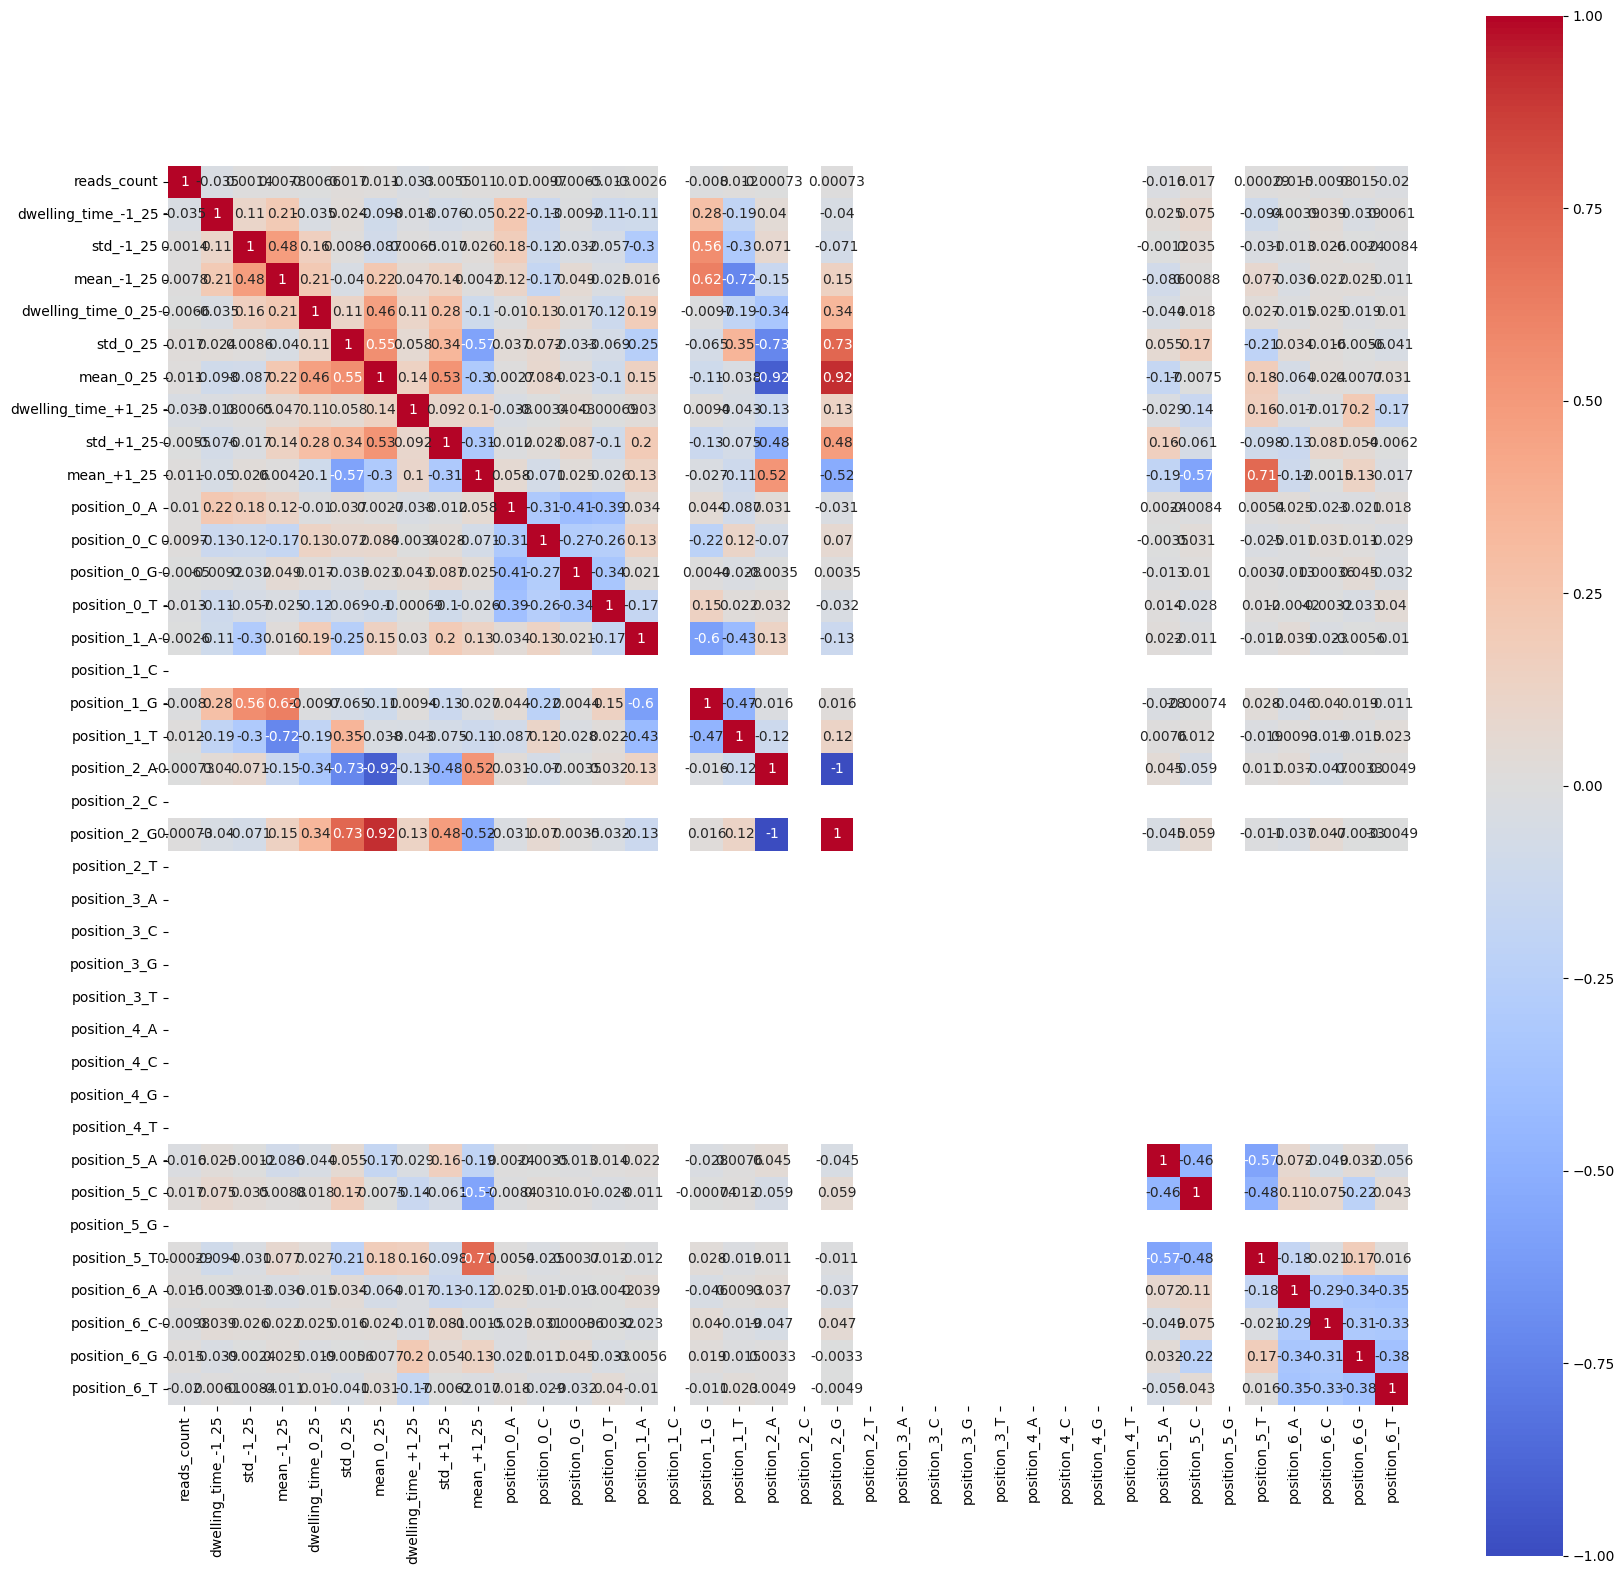

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_25.corr(), square = True,annot=True, cmap="coolwarm")

In [9]:
drop_X_train =  X_train_25.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G"], axis=1)

<AxesSubplot: >

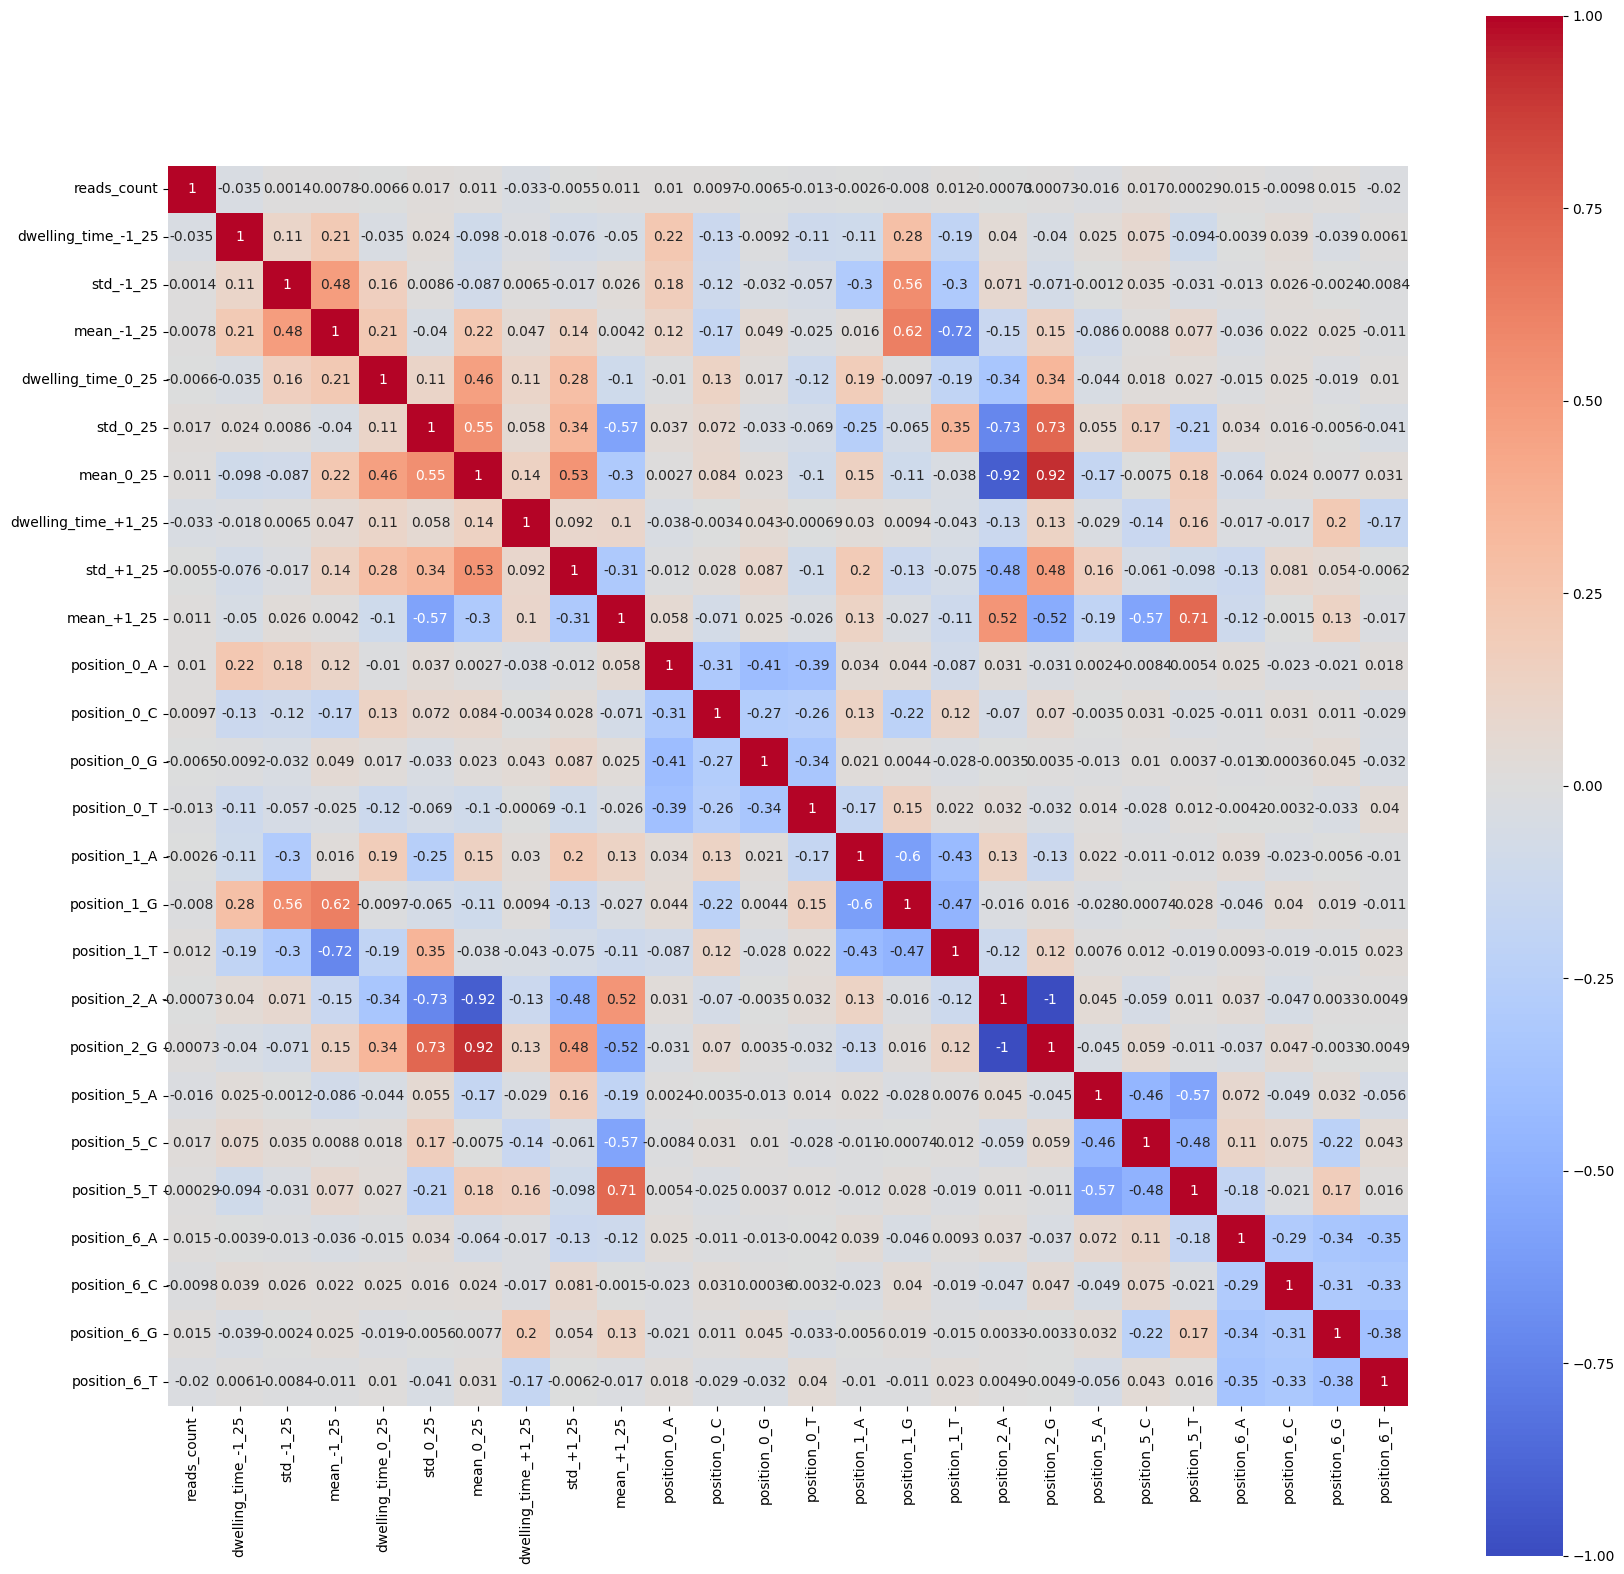

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(drop_X_train.corr(), square = True,annot=True, cmap="coolwarm")

In [ ]:
# Looking at the abs correlation,
#  position_2_A and std_0_25 = 0.73
#  position_2_G and std_0_25 = 0.73
#  position_2_A and mean_0_25 = 0.92
#  position_2_G and mean_0_25 = 0.92
#  position_1_T and mean_-1_25 = 0.72
#  position_5_T and mean_+1_25 = 0.71

# drop position_2_A , position_2_G, mean_-1_25, position_5_T

In [12]:
drop_X_train_25 =  X_train_25.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_25", "position_5_T"], axis=1)

drop_X_val_25 =  X_val_25.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_25", "position_5_T"], axis=1)
                                    
drop_X_test_25 =  X_test_25.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_25", "position_5_T"], axis=1)                                    


In [13]:
## check if training data are the same len
print(f"Number of Rows for X_train_25 and y_train: {len(drop_X_train_25)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_25 and y_val: {len(drop_X_val_25)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_25 and y_test: {len(drop_X_test_25)}, {len(y_test)}")

Number of Rows for X_train_25 and y_train: 30406, 30406
Number of Rows for X_val_25 and y_val: 12143, 12143
Number of Rows for X_test_25 and y_test: 11825, 11825


Accuracy of logistic regression classifier on validation set using 25th quantile: 0.91
Accuracy of logistic regression classifier on test set using 25th quantile: 0.92


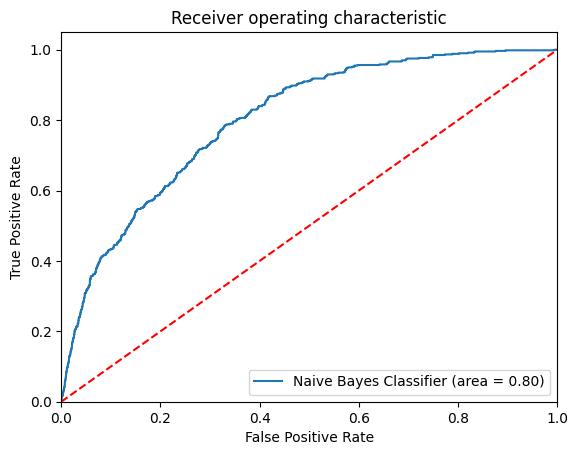

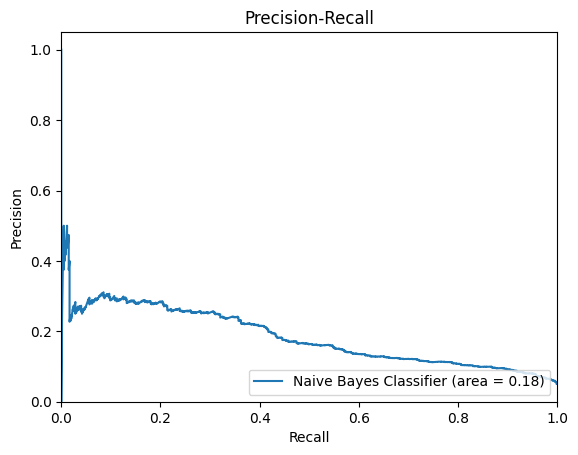

In [14]:
naive_bayes_transformed(drop_X_train_25, y_train, drop_X_val_25, y_val, drop_X_test_25, y_test, "25th quantile")

# On the 50th percentile

In [16]:
## define columns to drop
cols_to_drop_50 = ['dwelling_time_-1_25', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_75', 'std_-1_mean', 'mean_-1_25', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_25', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_25', 'std_0_75', 'std_0_mean', 'mean_0_25', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_25', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_75', 'std_+1_mean', 'mean_+1_25', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_50 = X_val.drop(columns = cols_to_drop_50, axis = 1)

## dropping columns from X_test set
X_test_50 = X_test.drop(columns = cols_to_drop_50, axis = 1)

## Load X_train_50
X_train_50_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

In [18]:
drop_X_train_50 =  X_train_50.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_50", "position_5_T"], axis=1)

drop_X_val_50 =  X_val_50.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_50", "position_5_T"], axis=1)
                                    
drop_X_test_50 =  X_test_50.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_50", "position_5_T"], axis=1)   

Accuracy of logistic regression classifier on validation set using 50th quantile: 0.91
Accuracy of logistic regression classifier on test set using 50th quantile: 0.92


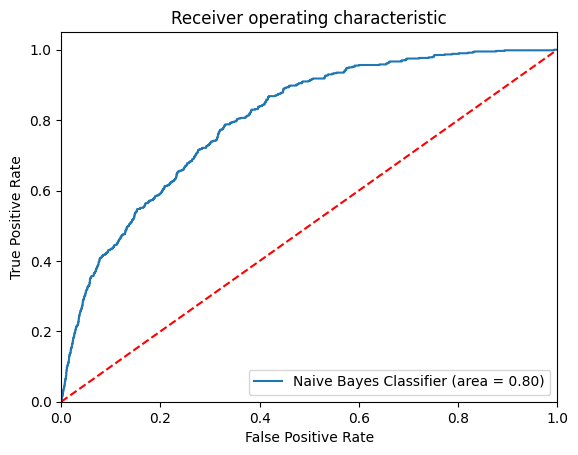

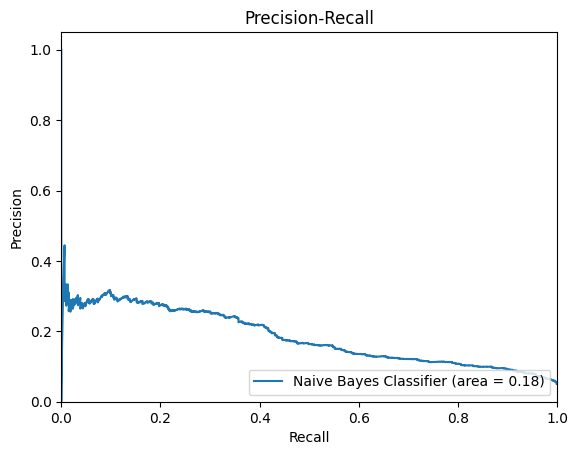

In [24]:
naive_bayes_transformed(drop_X_train_50, y_train, drop_X_val_50, y_val, drop_X_test_50, y_test, "50th quantile")

# Modelling on 75th quantile

In [21]:
## define columns to drop
cols_to_drop_75 = ['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_mean', 'std_-1_25', 'std_-1_50', 'std_-1_mean', 'mean_-1_25', 'mean_-1_50', 'mean_-1_mean',
                    'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_mean', 'std_0_25', 'std_0_50', 'std_0_mean', 'mean_0_25', 'mean_0_50', 'mean_0_mean',
                    'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_50', 'std_+1_mean', 'mean_+1_25', 'mean_+1_50', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_75 = X_val.drop(columns = cols_to_drop_75, axis = 1)

## dropping columns from X_test set
X_test_75 = X_test.drop(columns = cols_to_drop_75, axis = 1)

## Load X_train_75
X_train_75_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

In [22]:
drop_X_train_75 =  X_train_75.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_75", "position_5_T"], axis=1)

drop_X_val_75 =  X_val_75.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_75", "position_5_T"], axis=1)
                                    
drop_X_test_75 =  X_test_75.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_75", "position_5_T"], axis=1)  

Accuracy of logistic regression classifier on validation set using 75th quantile: 0.91
Accuracy of logistic regression classifier on test set using 75th quantile: 0.92


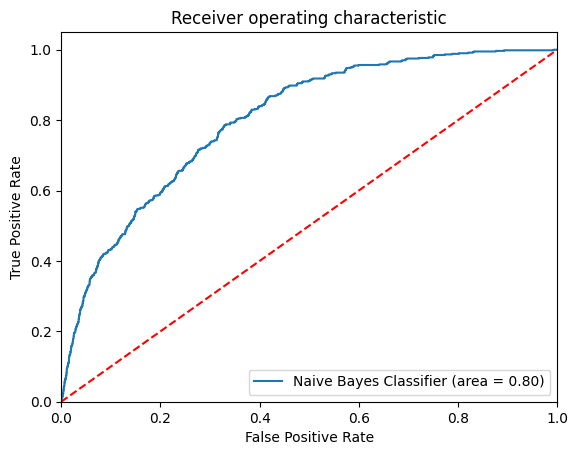

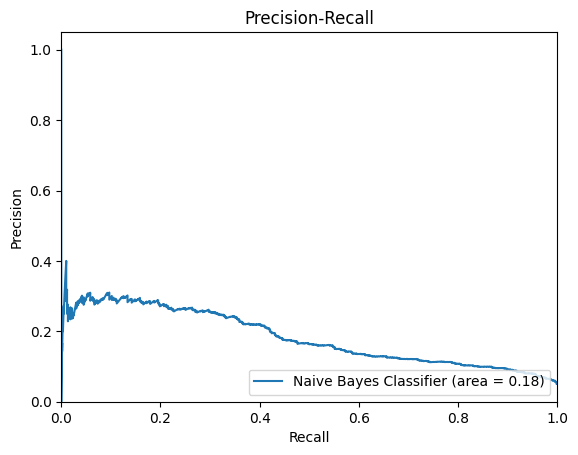

In [23]:
naive_bayes_transformed(drop_X_train_75, y_train, drop_X_val_75, y_val, drop_X_test_75, y_test, "75th quantile")

# Modelling on Mean

In [26]:
## define columns to drop
cols_to_drop_mean = ['dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'std_-1_25', 'std_-1_50', 'std_-1_75', 'mean_-1_25', 'mean_-1_50', 'mean_-1_75',
                    'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'std_0_25', 'std_0_50', 'std_0_75', 'mean_0_25', 'mean_0_50', 'mean_0_75',
                    'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'std_+1_25', 'std_+1_50', 'std_+1_75', 'mean_+1_25', 'mean_+1_50', 'mean_+1_75']

## dropping columns from X_validation set
X_val_mean = X_val.drop(columns = cols_to_drop_mean, axis = 1)

## dropping columns from X_test set
X_test_mean = X_test.drop(columns = cols_to_drop_mean, axis = 1)

## Load X_train_mean
X_train_mean_path = "/Users/Zoe/DSA4262-ACMXZ/data/new_preprocessed_data/training/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)

In [27]:
drop_X_train_mean =  X_train_mean.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_mean", "position_5_T"], axis=1)

drop_X_val_mean =  X_val_mean.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_mean", "position_5_T"], axis=1)
                                    
drop_X_test_mean =  X_test_mean.drop(['position_1_C', "position_2_C", "position_2_T", "position_3_A",
                                    "position_3_C", "position_3_T", "position_3_G", "position_4_A",
                                    "position_4_C", "position_4_T", "position_4_G", "position_5_G",
                                    'position_2_A', "position_2_G", "mean_-1_mean", "position_5_T"], axis=1)  

Accuracy of logistic regression classifier on validation set using mean: 0.91
Accuracy of logistic regression classifier on test set using mean: 0.92


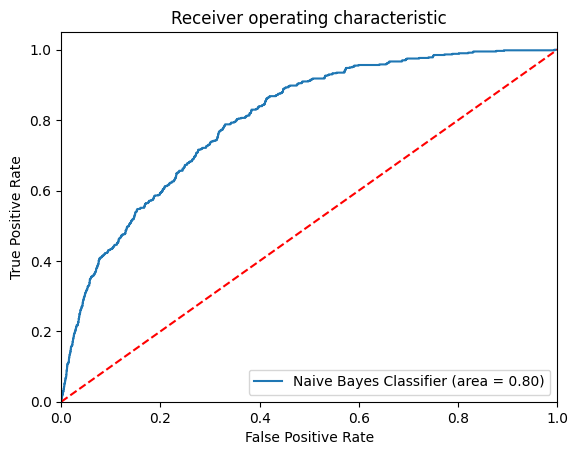

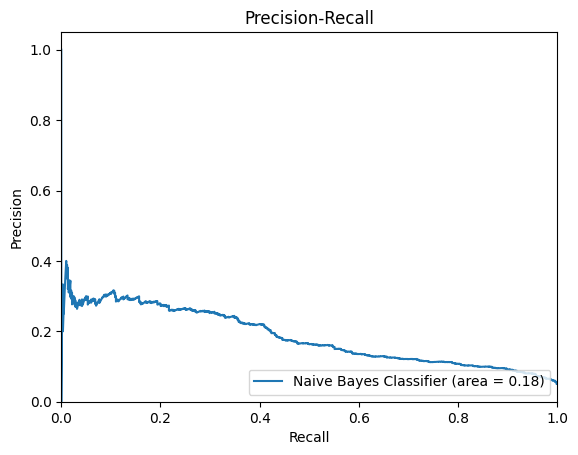

In [28]:
naive_bayes_transformed(drop_X_train_mean, y_train, drop_X_val_mean, y_val, drop_X_test_mean, y_test, "mean")